Enter the size of the board (N x N):  4



Solving step by step...

Placing queen at (0, 0)
Q . . . 
. . . . 
. . . . 
. . . . 
Placing queen at (2, 1)
Q . . . 
. . . . 
. Q . . 
. . . . 
Backtracking from (2, 1)
Q . . . 
. . . . 
. . . . 
. . . . 
Placing queen at (3, 1)
Q . . . 
. . . . 
. . . . 
. Q . . 
Placing queen at (1, 2)
Q . . . 
. . Q . 
. . . . 
. Q . . 
Backtracking from (1, 2)
Q . . . 
. . . . 
. . . . 
. Q . . 
Backtracking from (3, 1)
Q . . . 
. . . . 
. . . . 
. . . . 
Backtracking from (0, 0)
. . . . 
. . . . 
. . . . 
. . . . 
Placing queen at (1, 0)
. . . . 
Q . . . 
. . . . 
. . . . 
Placing queen at (3, 1)
. . . . 
Q . . . 
. . . . 
. Q . . 
Placing queen at (0, 2)
. . Q . 
Q . . . 
. . . . 
. Q . . 
Placing queen at (2, 3)
. . Q . 
Q . . . 
. . . Q 
. Q . . 
Final Solution:
. . Q . 
Q . . . 
. . . Q 
. Q . . 


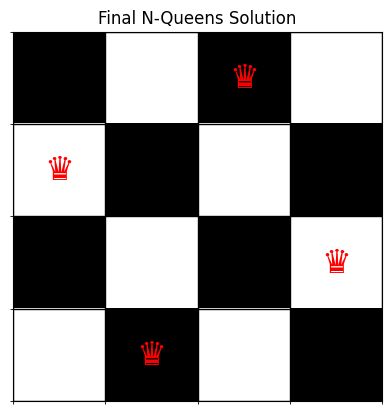

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def is_safe(board, row, col, n):
    for i in range(col):
        if board[row][i] == 1:
            return False

    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

def print_board(board):
    for row in board:
        for cell in row:
            print('Q' if cell else '.', end=' ')
        print()
    print("=" * 20)

def solve_n_queens(board, col, n):
    if col >= n:
        print("Final Solution:")
        print_board(board)
        return True

    for i in range(n):
        if is_safe(board, i, col, n):
            board[i][col] = 1
            print(f"Placing queen at ({i}, {col})")
            print_board(board)

            if solve_n_queens(board, col + 1, n):
                return True

            board[i][col] = 0  # BACKTRACK
            print(f"Backtracking from ({i}, {col})")
            print_board(board)

    return False

def show_final_board(board):
    n = len(board)
    board_np = np.array(board)
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(n+1)-0.5, minor=True)
    ax.set_yticks(np.arange(n+1)-0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.imshow([[((i+j)%2) for j in range(n)] for i in range(n)], cmap='gray')

    for i in range(n):
        for j in range(n):
            if board[i][j] == 1:
                ax.text(j, i, '♛', ha='center', va='center', fontsize=24, color='red')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Final N-Queens Solution")
    plt.show()

# Main function
if __name__ == "__main__":
    n = int(input("Enter the size of the board (N x N): "))
    board = [[0 for _ in range(n)] for _ in range(n)]
    print("\nSolving step by step...\n")
    if solve_n_queens(board, 0, n):
        show_final_board(board)
    else:
        print("No solution exists.")
